In [1]:
proj_path='/content/drive/MyDrive/S4 - 16824 VLR/generative-modeling/gan'

### Git Stuff

### Colab stuff

In [ ]:
# one-time data set-up
# #!pip show "clean-fid"
# !cd "$proj_path/$hw_dir" && source "setup_data.sh"
# !ls "/usr/local/lib/python3.7/dist-packages/cleanfid"
# !mkdir "/usr/local/lib/python3.7/dist-packages/cleanfid/stats"
# !cd "$proj_path/$hw_dir/$tasks" && cp cub_clean_custom_na.npz "/usr/local/lib/python3.7/dist-packages/cleanfid/stats/cub_clean_custom_na.npz"

## Notebook

In [1]:
import sys, pathlib
sys.path.append('./gan')
%load_ext autoreload
%autoreload 2

### GAN

In [4]:
from gan.networks import *
from gan.train import *
from gan.q1_3 import compute_discriminator_loss, compute_generator_loss
from networks import Discriminator, Generator

data dir exist:True
Epoch after iters:93. D.Loss:1.2965189218521118.G.Loss:0.8051266670227051. LR:[0.0001999628]
Epoch after iters:186. D.Loss:1.3865768909454346.G.Loss:0.9150365591049194. LR:[0.0001999256]
Epoch after iters:279. D.Loss:1.4179582595825195.G.Loss:0.7099700570106506. LR:[0.0001998884]
Epoch after iters:372. D.Loss:1.789136290550232.G.Loss:0.3503444194793701. LR:[0.0001998512]
Epoch after iters:465. D.Loss:1.1580328941345215.G.Loss:1.9012601375579834. LR:[0.000199814]
Epoch after iters:558. D.Loss:1.4779295921325684.G.Loss:1.2967159748077393. LR:[0.0001997768]
Epoch after iters:651. D.Loss:1.1156015396118164.G.Loss:1.2004121541976929. LR:[0.0001997396]
Epoch after iters:744. D.Loss:1.079763412475586.G.Loss:1.2328003644943237. LR:[0.0001997024]
Epoch after iters:837. D.Loss:1.4766446352005005.G.Loss:1.2260570526123047. LR:[0.0001996652]
Epoch after iters:930. D.Loss:1.8002855777740479.G.Loss:1.0721397399902344. LR:[0.000199628]
compute FID of a model with cub-32 statistics

FID model: 100%|███████████████████████████████████| 79/79 [01:37<00:00,  1.24s/it]


Iteration 1000 FID: 337.45226126163635
Epoch after iters:1023. D.Loss:1.4823927879333496.G.Loss:0.299092561006546. LR:[0.0001995908]
Epoch after iters:1116. D.Loss:1.3543026447296143.G.Loss:0.7330020070075989. LR:[0.0001995536]
Epoch after iters:1209. D.Loss:1.4910953044891357.G.Loss:1.0883421897888184. LR:[0.0001995164]
Epoch after iters:1302. D.Loss:1.3836954832077026.G.Loss:0.711723804473877. LR:[0.0001994792]
Epoch after iters:1395. D.Loss:1.381585955619812.G.Loss:0.8841276168823242. LR:[0.000199442]
Epoch after iters:1488. D.Loss:1.3173601627349854.G.Loss:0.8312387466430664. LR:[0.0001994048]
Epoch after iters:1581. D.Loss:1.0486550331115723.G.Loss:0.8983088731765747. LR:[0.0001993676]
Epoch after iters:1674. D.Loss:1.2984663248062134.G.Loss:1.1027106046676636. LR:[0.0001993304]
Epoch after iters:1767. D.Loss:1.4934966564178467.G.Loss:1.0528711080551147. LR:[0.0001992932]
Epoch after iters:1860. D.Loss:1.2324700355529785.G.Loss:0.7679365873336792. LR:[0.00019925600000000003]
Epoch

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.17s/it]


Iteration 2000 FID: 271.33329395719613
Epoch after iters:2046. D.Loss:1.062780499458313.G.Loss:0.9878098964691162. LR:[0.0001991816]
Epoch after iters:2139. D.Loss:1.2137365341186523.G.Loss:0.8207645416259766. LR:[0.0001991444]
Epoch after iters:2232. D.Loss:1.1921420097351074.G.Loss:0.8133063316345215. LR:[0.0001991072]
Epoch after iters:2325. D.Loss:1.104339599609375.G.Loss:0.8703621625900269. LR:[0.00019907]
Epoch after iters:2418. D.Loss:1.5216975212097168.G.Loss:0.6215618848800659. LR:[0.00019903280000000003]
Epoch after iters:2511. D.Loss:1.0843048095703125.G.Loss:0.5209553241729736. LR:[0.0001989956]
Epoch after iters:2604. D.Loss:1.2772247791290283.G.Loss:0.8050704002380371. LR:[0.0001989584]
Epoch after iters:2697. D.Loss:1.3227916955947876.G.Loss:0.8371374607086182. LR:[0.0001989212]
Epoch after iters:2790. D.Loss:1.2474530935287476.G.Loss:0.819191038608551. LR:[0.000198884]
Epoch after iters:2883. D.Loss:1.1651663780212402.G.Loss:0.7533961534500122. LR:[0.0001988468]
Epoch a

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.17s/it]


Iteration 3000 FID: 280.98320225305883
Epoch after iters:3069. D.Loss:1.5033669471740723.G.Loss:0.6256616711616516. LR:[0.0001987724]
Epoch after iters:3162. D.Loss:2.3910470008850098.G.Loss:1.3014384508132935. LR:[0.0001987352]
Epoch after iters:3255. D.Loss:0.9611914157867432.G.Loss:0.8307912349700928. LR:[0.000198698]
Epoch after iters:3348. D.Loss:1.2795820236206055.G.Loss:0.9243721961975098. LR:[0.0001986608]
Epoch after iters:3441. D.Loss:1.2647292613983154.G.Loss:0.7763608694076538. LR:[0.0001986236]
Epoch after iters:3534. D.Loss:0.987680971622467.G.Loss:0.9044722318649292. LR:[0.00019858640000000003]
Epoch after iters:3627. D.Loss:1.113325834274292.G.Loss:0.9938660860061646. LR:[0.0001985492]
Epoch after iters:3720. D.Loss:1.457436203956604.G.Loss:0.5352312326431274. LR:[0.000198512]
Epoch after iters:3813. D.Loss:1.2118020057678223.G.Loss:0.8661961555480957. LR:[0.0001984748]
Epoch after iters:3906. D.Loss:0.9654188752174377.G.Loss:0.9338169097900391. LR:[0.0001984376]
Epoch 

FID model: 100%|███████████████████████████████████| 79/79 [01:34<00:00,  1.20s/it]


Iteration 4000 FID: 352.6055100488659
Epoch after iters:4092. D.Loss:1.2703534364700317.G.Loss:0.8398666381835938. LR:[0.00019836320000000003]
Epoch after iters:4185. D.Loss:1.4411494731903076.G.Loss:1.0965850353240967. LR:[0.00019832600000000003]
Epoch after iters:4278. D.Loss:1.4288161993026733.G.Loss:0.8136955499649048. LR:[0.0001982888]
Epoch after iters:4371. D.Loss:1.2598665952682495.G.Loss:0.6512877941131592. LR:[0.0001982516]
Epoch after iters:4464. D.Loss:0.9776318669319153.G.Loss:1.9622474908828735. LR:[0.0001982144]
Epoch after iters:4557. D.Loss:1.0627738237380981.G.Loss:1.046555519104004. LR:[0.00019817720000000002]
Epoch after iters:4650. D.Loss:0.9000556468963623.G.Loss:0.7646839022636414. LR:[0.00019814000000000002]
Epoch after iters:4743. D.Loss:1.5212223529815674.G.Loss:1.2297132015228271. LR:[0.00019810280000000002]
Epoch after iters:4836. D.Loss:0.921729564666748.G.Loss:1.1017539501190186. LR:[0.0001980656]
Epoch after iters:4929. D.Loss:1.2222137451171875.G.Loss:0.

FID model: 100%|███████████████████████████████████| 79/79 [01:31<00:00,  1.16s/it]


Iteration 5000 FID: 338.8745414212567
Epoch after iters:5022. D.Loss:1.368135929107666.G.Loss:0.8412001132965088. LR:[0.0001979912]
Epoch after iters:5115. D.Loss:1.0562453269958496.G.Loss:0.7899194955825806. LR:[0.00019795400000000002]
Epoch after iters:5208. D.Loss:1.3063883781433105.G.Loss:0.7350084781646729. LR:[0.00019791680000000002]
Epoch after iters:5301. D.Loss:0.9547079205513.G.Loss:0.4743446111679077. LR:[0.00019787960000000002]
Epoch after iters:5394. D.Loss:1.227074384689331.G.Loss:1.2184691429138184. LR:[0.0001978424]
Epoch after iters:5487. D.Loss:1.3350608348846436.G.Loss:0.9725455045700073. LR:[0.0001978052]
Epoch after iters:5580. D.Loss:1.1522653102874756.G.Loss:1.0236088037490845. LR:[0.00019776800000000002]
Epoch after iters:5673. D.Loss:1.369063377380371.G.Loss:1.2846895456314087. LR:[0.00019773080000000002]
Epoch after iters:5766. D.Loss:1.0757843255996704.G.Loss:0.5940822958946228. LR:[0.00019769360000000002]
Epoch after iters:5859. D.Loss:1.0188448429107666.G.L

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.19s/it]


Iteration 6000 FID: 315.36363372632144
Epoch after iters:6045. D.Loss:0.7990148067474365.G.Loss:0.8435491323471069. LR:[0.000197582]
Epoch after iters:6138. D.Loss:1.0007048845291138.G.Loss:0.5543619394302368. LR:[0.00019754480000000002]
Epoch after iters:6231. D.Loss:0.862816572189331.G.Loss:1.4430103302001953. LR:[0.00019750760000000002]
Epoch after iters:6324. D.Loss:1.4961628913879395.G.Loss:1.067347526550293. LR:[0.00019747040000000002]
Epoch after iters:6417. D.Loss:1.0833295583724976.G.Loss:0.9728648066520691. LR:[0.00019743320000000002]
Epoch after iters:6510. D.Loss:0.9250163435935974.G.Loss:0.9629653692245483. LR:[0.000197396]
Epoch after iters:6603. D.Loss:1.128275752067566.G.Loss:0.7479844689369202. LR:[0.0001973588]
Epoch after iters:6696. D.Loss:0.8507636189460754.G.Loss:1.2487730979919434. LR:[0.00019732160000000002]
Epoch after iters:6789. D.Loss:1.016493797302246.G.Loss:1.886820673942566. LR:[0.00019728440000000002]
Epoch after iters:6882. D.Loss:1.0820461511611938.G.L

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.18s/it]


Iteration 7000 FID: 328.0602622276027
Epoch after iters:7068. D.Loss:1.1068388223648071.G.Loss:0.993068277835846. LR:[0.0001971728]
Epoch after iters:7161. D.Loss:1.084958791732788.G.Loss:0.6422247886657715. LR:[0.00019713560000000002]
Epoch after iters:7254. D.Loss:1.382932424545288.G.Loss:0.7034571766853333. LR:[0.00019709840000000002]
Epoch after iters:7347. D.Loss:1.754704236984253.G.Loss:1.392751693725586. LR:[0.00019706120000000002]
Epoch after iters:7440. D.Loss:1.4345864057540894.G.Loss:1.401498794555664. LR:[0.00019702400000000002]
Epoch after iters:7533. D.Loss:1.0988571643829346.G.Loss:0.8475308418273926. LR:[0.00019698680000000002]
Epoch after iters:7626. D.Loss:0.8595502972602844.G.Loss:0.7061614990234375. LR:[0.0001969496]
Epoch after iters:7719. D.Loss:0.8317729234695435.G.Loss:1.3072452545166016. LR:[0.00019691240000000002]
Epoch after iters:7812. D.Loss:1.4119970798492432.G.Loss:0.9217453002929688. LR:[0.00019687520000000002]
Epoch after iters:7905. D.Loss:1.2318114042

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.17s/it]


Iteration 8000 FID: 306.6090578459596
Epoch after iters:8091. D.Loss:1.081333875656128.G.Loss:0.7580382227897644. LR:[0.00019676360000000001]
Epoch after iters:8184. D.Loss:0.7411500215530396.G.Loss:1.0939991474151611. LR:[0.0001967264]
Epoch after iters:8277. D.Loss:1.2402468919754028.G.Loss:1.0007096529006958. LR:[0.00019668920000000001]
Epoch after iters:8370. D.Loss:1.1470859050750732.G.Loss:0.9598626494407654. LR:[0.00019665200000000001]
Epoch after iters:8463. D.Loss:1.5836976766586304.G.Loss:0.9512246251106262. LR:[0.00019661480000000001]
Epoch after iters:8556. D.Loss:1.155547857284546.G.Loss:1.3115019798278809. LR:[0.0001965776]
Epoch after iters:8649. D.Loss:0.8651965856552124.G.Loss:2.0885939598083496. LR:[0.0001965404]
Epoch after iters:8742. D.Loss:1.1408884525299072.G.Loss:1.080156922340393. LR:[0.00019650319999999999]
Epoch after iters:8835. D.Loss:1.4273104667663574.G.Loss:1.0593032836914062. LR:[0.000196466]
Epoch after iters:8928. D.Loss:1.9592820405960083.G.Loss:1.24

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.19s/it]


Iteration 9000 FID: 308.46903348134765
Epoch after iters:9021. D.Loss:0.9649249315261841.G.Loss:0.9683651924133301. LR:[0.0001963916]
Epoch after iters:9114. D.Loss:1.6396422386169434.G.Loss:1.1111564636230469. LR:[0.0001963544]
Epoch after iters:9207. D.Loss:0.9292855262756348.G.Loss:1.0690875053405762. LR:[0.0001963172]
Epoch after iters:9300. D.Loss:1.0261268615722656.G.Loss:0.7700649499893188. LR:[0.00019628]
Epoch after iters:9393. D.Loss:1.0962973833084106.G.Loss:1.1046721935272217. LR:[0.0001962428]
Epoch after iters:9486. D.Loss:0.9473550915718079.G.Loss:2.1743812561035156. LR:[0.0001962056]
Epoch after iters:9579. D.Loss:1.269532322883606.G.Loss:0.9488903880119324. LR:[0.0001961684]
Epoch after iters:9672. D.Loss:0.9405020475387573.G.Loss:0.6181723475456238. LR:[0.0001961312]
Epoch after iters:9765. D.Loss:1.531302571296692.G.Loss:1.3687024116516113. LR:[0.000196094]
Epoch after iters:9858. D.Loss:1.131932258605957.G.Loss:0.7572574615478516. LR:[0.0001960568]
Epoch after iters

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.19s/it]


Iteration 10000 FID: 299.39910468598515
Epoch after iters:10044. D.Loss:1.1846569776535034.G.Loss:0.9017992615699768. LR:[0.0001959824]
Epoch after iters:10137. D.Loss:1.0186069011688232.G.Loss:1.040771484375. LR:[0.0001959452]
Epoch after iters:10230. D.Loss:0.9498095512390137.G.Loss:2.029052257537842. LR:[0.000195908]
Epoch after iters:10323. D.Loss:0.8808311223983765.G.Loss:1.0438913106918335. LR:[0.0001958708]
Epoch after iters:10416. D.Loss:0.781355619430542.G.Loss:1.5926119089126587. LR:[0.0001958336]
Epoch after iters:10509. D.Loss:0.9813541769981384.G.Loss:1.384230613708496. LR:[0.0001957964]
Epoch after iters:10602. D.Loss:1.4673547744750977.G.Loss:0.8826547861099243. LR:[0.0001957592]
Epoch after iters:10695. D.Loss:0.7158271074295044.G.Loss:1.610792636871338. LR:[0.000195722]
Epoch after iters:10788. D.Loss:1.1687965393066406.G.Loss:0.8281551003456116. LR:[0.0001956848]
Epoch after iters:10881. D.Loss:1.2553174495697021.G.Loss:1.0085006952285767. LR:[0.0001956476]
Epoch afte

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.17s/it]


Iteration 11000 FID: 308.4450237620237
Epoch after iters:11067. D.Loss:0.8892632722854614.G.Loss:1.8466582298278809. LR:[0.0001955732]
Epoch after iters:11160. D.Loss:0.7000767588615417.G.Loss:1.1482484340667725. LR:[0.000195536]
Epoch after iters:11253. D.Loss:1.7124242782592773.G.Loss:0.745721161365509. LR:[0.0001954988]
Epoch after iters:11346. D.Loss:1.0606722831726074.G.Loss:0.8519822955131531. LR:[0.0001954616]
Epoch after iters:11439. D.Loss:1.2572784423828125.G.Loss:1.330779790878296. LR:[0.0001954244]
Epoch after iters:11532. D.Loss:1.0753389596939087.G.Loss:1.544123649597168. LR:[0.0001953872]
Epoch after iters:11625. D.Loss:0.8568471074104309.G.Loss:1.7226721048355103. LR:[0.00019535]
Epoch after iters:11718. D.Loss:0.8716620802879333.G.Loss:1.7448298931121826. LR:[0.0001953128]
Epoch after iters:11811. D.Loss:1.339017391204834.G.Loss:1.9554641246795654. LR:[0.0001952756]
Epoch after iters:11904. D.Loss:0.8172184228897095.G.Loss:0.9186394810676575. LR:[0.0001952384]
Epoch af

FID model: 100%|███████████████████████████████████| 79/79 [01:34<00:00,  1.20s/it]


Iteration 12000 FID: 298.4172465287294
Epoch after iters:12090. D.Loss:1.2266662120819092.G.Loss:2.2796454429626465. LR:[0.000195164]
Epoch after iters:12183. D.Loss:0.5483112335205078.G.Loss:1.563901424407959. LR:[0.0001951268]
Epoch after iters:12276. D.Loss:1.088793158531189.G.Loss:1.2303498983383179. LR:[0.0001950896]
Epoch after iters:12369. D.Loss:1.5930372476577759.G.Loss:0.8007956743240356. LR:[0.0001950524]
Epoch after iters:12462. D.Loss:1.2936310768127441.G.Loss:1.74761164188385. LR:[0.00019501520000000003]
Epoch after iters:12555. D.Loss:0.9144219756126404.G.Loss:1.267207145690918. LR:[0.00019497800000000003]
Epoch after iters:12648. D.Loss:0.5164323449134827.G.Loss:0.7978394031524658. LR:[0.0001949408]
Epoch after iters:12741. D.Loss:0.5485541820526123.G.Loss:0.9789102077484131. LR:[0.0001949036]
Epoch after iters:12834. D.Loss:0.5466813445091248.G.Loss:1.8969817161560059. LR:[0.0001948664]
Epoch after iters:12927. D.Loss:1.5570791959762573.G.Loss:1.3900926113128662. LR:[0

FID model: 100%|███████████████████████████████████| 79/79 [01:36<00:00,  1.23s/it]


Iteration 13000 FID: 270.2506720248043
Epoch after iters:13020. D.Loss:1.0040578842163086.G.Loss:1.4220751523971558. LR:[0.00019479200000000003]
Epoch after iters:13113. D.Loss:0.5062382817268372.G.Loss:1.5354036092758179. LR:[0.00019475480000000003]
Epoch after iters:13206. D.Loss:0.5883297920227051.G.Loss:2.0261545181274414. LR:[0.0001947176]
Epoch after iters:13299. D.Loss:0.990822434425354.G.Loss:1.8560614585876465. LR:[0.0001946804]
Epoch after iters:13392. D.Loss:1.2227563858032227.G.Loss:1.8694462776184082. LR:[0.0001946432]
Epoch after iters:13485. D.Loss:1.343074083328247.G.Loss:1.0675137042999268. LR:[0.000194606]
Epoch after iters:13578. D.Loss:0.5110346078872681.G.Loss:1.9371416568756104. LR:[0.00019456880000000003]
Epoch after iters:13671. D.Loss:0.7136268615722656.G.Loss:1.2891043424606323. LR:[0.00019453160000000003]
Epoch after iters:13764. D.Loss:2.1267249584198.G.Loss:2.1987454891204834. LR:[0.0001944944]
Epoch after iters:13857. D.Loss:0.7657463550567627.G.Loss:1.191

FID model: 100%|███████████████████████████████████| 79/79 [01:36<00:00,  1.22s/it]


Iteration 14000 FID: 295.8072931074976
Epoch after iters:14043. D.Loss:0.7988682985305786.G.Loss:1.872788667678833. LR:[0.0001943828]
Epoch after iters:14136. D.Loss:0.7093119025230408.G.Loss:0.9957669973373413. LR:[0.00019434560000000003]
Epoch after iters:14229. D.Loss:0.9032197594642639.G.Loss:2.6468560695648193. LR:[0.00019430840000000002]
Epoch after iters:14322. D.Loss:2.4717965126037598.G.Loss:1.0236929655075073. LR:[0.0001942712]
Epoch after iters:14415. D.Loss:1.461785078048706.G.Loss:2.796252727508545. LR:[0.000194234]
Epoch after iters:14508. D.Loss:0.6063731908798218.G.Loss:1.6638314723968506. LR:[0.0001941968]
Epoch after iters:14601. D.Loss:0.6473473310470581.G.Loss:1.3660229444503784. LR:[0.00019415960000000002]
Epoch after iters:14694. D.Loss:0.43992289900779724.G.Loss:1.906907558441162. LR:[0.00019412240000000002]
Epoch after iters:14787. D.Loss:0.9169194102287292.G.Loss:2.4349141120910645. LR:[0.00019408520000000002]
Epoch after iters:14880. D.Loss:1.559574007987976.G

FID model: 100%|███████████████████████████████████| 79/79 [01:35<00:00,  1.21s/it]


Iteration 15000 FID: 272.23806274646415
Epoch after iters:15066. D.Loss:1.4900612831115723.G.Loss:1.9327877759933472. LR:[0.0001939736]
Epoch after iters:15159. D.Loss:1.119936466217041.G.Loss:1.7481260299682617. LR:[0.00019393640000000002]
Epoch after iters:15252. D.Loss:0.6107574701309204.G.Loss:2.541532516479492. LR:[0.00019389920000000002]
Epoch after iters:15345. D.Loss:0.5684351921081543.G.Loss:1.8265515565872192. LR:[0.00019386200000000002]
Epoch after iters:15438. D.Loss:0.773901104927063.G.Loss:1.2652645111083984. LR:[0.0001938248]
Epoch after iters:15531. D.Loss:0.26421600580215454.G.Loss:2.8951845169067383. LR:[0.0001937876]
Epoch after iters:15624. D.Loss:1.0725996494293213.G.Loss:2.392207145690918. LR:[0.0001937504]
Epoch after iters:15717. D.Loss:0.9631500244140625.G.Loss:2.3826746940612793. LR:[0.00019371320000000002]
Epoch after iters:15810. D.Loss:0.4392363429069519.G.Loss:1.8077170848846436. LR:[0.00019367600000000002]
Epoch after iters:15903. D.Loss:1.826518177986145

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.18s/it]


Iteration 16000 FID: 269.2679144106013
Epoch after iters:16089. D.Loss:0.22811146080493927.G.Loss:2.856137275695801. LR:[0.0001935644]
Epoch after iters:16182. D.Loss:0.7877925038337708.G.Loss:2.562972068786621. LR:[0.00019352720000000002]
Epoch after iters:16275. D.Loss:1.45614492893219.G.Loss:2.909024238586426. LR:[0.00019349000000000002]
Epoch after iters:16368. D.Loss:0.2039123773574829.G.Loss:2.57674503326416. LR:[0.00019345280000000002]
Epoch after iters:16461. D.Loss:1.714604139328003.G.Loss:1.664194107055664. LR:[0.00019341560000000002]
Epoch after iters:16554. D.Loss:0.321835458278656.G.Loss:3.345719814300537. LR:[0.0001933784]
Epoch after iters:16647. D.Loss:0.3841109275817871.G.Loss:2.640986919403076. LR:[0.0001933412]
Epoch after iters:16740. D.Loss:0.9960913062095642.G.Loss:2.1578521728515625. LR:[0.00019330400000000002]
Epoch after iters:16833. D.Loss:0.21578730642795563.G.Loss:3.4225499629974365. LR:[0.00019326680000000002]
Epoch after iters:16926. D.Loss:0.3478206992149

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.18s/it]


Iteration 17000 FID: 252.2915236998728
Epoch after iters:17019. D.Loss:0.22945207357406616.G.Loss:2.7397332191467285. LR:[0.00019319240000000002]
Epoch after iters:17112. D.Loss:0.6986076831817627.G.Loss:2.695878028869629. LR:[0.0001931552]
Epoch after iters:17205. D.Loss:0.4767285883426666.G.Loss:2.262057304382324. LR:[0.000193118]
Epoch after iters:17298. D.Loss:0.25165578722953796.G.Loss:1.733479380607605. LR:[0.00019308080000000002]
Epoch after iters:17391. D.Loss:1.2149524688720703.G.Loss:2.9100985527038574. LR:[0.00019304360000000002]
Epoch after iters:17484. D.Loss:0.39150869846343994.G.Loss:2.6621954441070557. LR:[0.00019300640000000002]
Epoch after iters:17577. D.Loss:0.14493127167224884.G.Loss:1.7910747528076172. LR:[0.00019296920000000002]
Epoch after iters:17670. D.Loss:0.21550922095775604.G.Loss:1.4871565103530884. LR:[0.000192932]
Epoch after iters:17763. D.Loss:0.9798759818077087.G.Loss:2.9206113815307617. LR:[0.00019289480000000002]
Epoch after iters:17856. D.Loss:2.118

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.18s/it]


Iteration 18000 FID: 268.0968964180184
Epoch after iters:18042. D.Loss:0.4845152795314789.G.Loss:3.0493359565734863. LR:[0.00019278320000000001]
Epoch after iters:18135. D.Loss:0.36844027042388916.G.Loss:2.39019775390625. LR:[0.00019274600000000001]
Epoch after iters:18228. D.Loss:0.8414566516876221.G.Loss:4.109208106994629. LR:[0.0001927088]
Epoch after iters:18321. D.Loss:0.3258132040500641.G.Loss:3.976055860519409. LR:[0.00019267160000000001]
Epoch after iters:18414. D.Loss:1.2888246774673462.G.Loss:1.9844322204589844. LR:[0.00019263440000000001]
Epoch after iters:18507. D.Loss:0.5585441589355469.G.Loss:4.312902450561523. LR:[0.0001925972]
Epoch after iters:18600. D.Loss:0.37467899918556213.G.Loss:2.723224401473999. LR:[0.00019256]
Epoch after iters:18693. D.Loss:0.36306312680244446.G.Loss:2.2880964279174805. LR:[0.0001925228]
Epoch after iters:18786. D.Loss:0.11991824209690094.G.Loss:2.561332941055298. LR:[0.0001924856]
Epoch after iters:18879. D.Loss:0.041001852601766586.G.Loss:4.

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.17s/it]


Iteration 19000 FID: 248.82577245343845
Epoch after iters:19065. D.Loss:0.483283132314682.G.Loss:2.6066813468933105. LR:[0.000192374]
Epoch after iters:19158. D.Loss:0.19866833090782166.G.Loss:3.0740015506744385. LR:[0.0001923368]
Epoch after iters:19251. D.Loss:0.2681618928909302.G.Loss:3.708409070968628. LR:[0.0001922996]
Epoch after iters:19344. D.Loss:0.19780784845352173.G.Loss:4.01698637008667. LR:[0.0001922624]
Epoch after iters:19437. D.Loss:0.2075241208076477.G.Loss:4.253576278686523. LR:[0.0001922252]
Epoch after iters:19530. D.Loss:0.1328609436750412.G.Loss:1.8889288902282715. LR:[0.000192188]
Epoch after iters:19623. D.Loss:0.7819368839263916.G.Loss:3.115295648574829. LR:[0.0001921508]
Epoch after iters:19716. D.Loss:0.8100985288619995.G.Loss:5.54448127746582. LR:[0.0001921136]
Epoch after iters:19809. D.Loss:1.050255298614502.G.Loss:4.697426795959473. LR:[0.0001920764]
Epoch after iters:19902. D.Loss:1.9426302909851074.G.Loss:3.684691905975342. LR:[0.0001920392]
Epoch after

FID model: 100%|███████████████████████████████████| 79/79 [01:34<00:00,  1.20s/it]


Iteration 20000 FID: 247.37350274031363
Epoch after iters:20088. D.Loss:0.4023003578186035.G.Loss:4.384624481201172. LR:[0.0001919648]
Epoch after iters:20181. D.Loss:0.22109036147594452.G.Loss:3.9774787425994873. LR:[0.0001919276]
Epoch after iters:20274. D.Loss:0.15609924495220184.G.Loss:2.5349044799804688. LR:[0.0001918904]
Epoch after iters:20367. D.Loss:0.68756502866745.G.Loss:3.3664920330047607. LR:[0.0001918532]
Epoch after iters:20460. D.Loss:0.9714176058769226.G.Loss:3.371377468109131. LR:[0.000191816]
Epoch after iters:20553. D.Loss:0.09218792617321014.G.Loss:2.899569034576416. LR:[0.0001917788]
Epoch after iters:20646. D.Loss:0.6134817004203796.G.Loss:3.1295323371887207. LR:[0.0001917416]
Epoch after iters:20739. D.Loss:0.09990599751472473.G.Loss:4.554757118225098. LR:[0.0001917044]
Epoch after iters:20832. D.Loss:0.758735179901123.G.Loss:4.844664573669434. LR:[0.0001916672]
Epoch after iters:20925. D.Loss:0.10090851783752441.G.Loss:4.000260353088379. LR:[0.00019163000000000

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.19s/it]


Iteration 21000 FID: 254.4310685597153
Epoch after iters:21018. D.Loss:0.15560753643512726.G.Loss:5.220082759857178. LR:[0.0001915928]
Epoch after iters:21111. D.Loss:0.5981794595718384.G.Loss:3.9237139225006104. LR:[0.0001915556]
Epoch after iters:21204. D.Loss:0.9734535813331604.G.Loss:3.5961289405822754. LR:[0.0001915184]
Epoch after iters:21297. D.Loss:0.3279103636741638.G.Loss:5.420825004577637. LR:[0.0001914812]
Epoch after iters:21390. D.Loss:0.6061016321182251.G.Loss:5.108797073364258. LR:[0.000191444]
Epoch after iters:21483. D.Loss:0.8666124939918518.G.Loss:5.505937576293945. LR:[0.00019140680000000003]
Epoch after iters:21576. D.Loss:0.1573691964149475.G.Loss:4.4383544921875. LR:[0.0001913696]
Epoch after iters:21669. D.Loss:0.7403108477592468.G.Loss:2.611513614654541. LR:[0.0001913324]
Epoch after iters:21762. D.Loss:0.3015950620174408.G.Loss:7.106334209442139. LR:[0.0001912952]
Epoch after iters:21855. D.Loss:0.5998463034629822.G.Loss:4.006406307220459. LR:[0.000191258]
Ep

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.18s/it]


Iteration 22000 FID: 258.1748085358281
Epoch after iters:22041. D.Loss:0.15327942371368408.G.Loss:4.559596061706543. LR:[0.00019118360000000003]
Epoch after iters:22134. D.Loss:0.033434025943279266.G.Loss:4.515124320983887. LR:[0.0001911464]
Epoch after iters:22227. D.Loss:0.04472123086452484.G.Loss:5.148606300354004. LR:[0.0001911092]
Epoch after iters:22320. D.Loss:0.4885449707508087.G.Loss:3.740771532058716. LR:[0.000191072]
Epoch after iters:22413. D.Loss:0.09084320068359375.G.Loss:6.240896224975586. LR:[0.0001910348]
Epoch after iters:22506. D.Loss:0.3062421679496765.G.Loss:6.337797164916992. LR:[0.0001909976]
Epoch after iters:22599. D.Loss:0.13826799392700195.G.Loss:5.610210418701172. LR:[0.00019096040000000003]
Epoch after iters:22692. D.Loss:0.995437741279602.G.Loss:5.886153221130371. LR:[0.0001909232]
Epoch after iters:22785. D.Loss:1.2669042348861694.G.Loss:4.657374858856201. LR:[0.000190886]
Epoch after iters:22878. D.Loss:0.9675086140632629.G.Loss:5.6833176612854. LR:[0.00

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.17s/it]


Iteration 23000 FID: 235.4352456037619
Epoch after iters:23064. D.Loss:0.07831967622041702.G.Loss:4.551461219787598. LR:[0.00019077440000000003]
Epoch after iters:23157. D.Loss:0.029942966997623444.G.Loss:4.198976516723633. LR:[0.00019073720000000003]
Epoch after iters:23250. D.Loss:0.25606051087379456.G.Loss:4.95236873626709. LR:[0.0001907]
Epoch after iters:23343. D.Loss:0.41182586550712585.G.Loss:5.77402925491333. LR:[0.0001906628]
Epoch after iters:23436. D.Loss:0.10929693281650543.G.Loss:5.833367347717285. LR:[0.0001906256]
Epoch after iters:23529. D.Loss:0.06825271993875504.G.Loss:5.172018051147461. LR:[0.0001905884]
Epoch after iters:23622. D.Loss:0.19460168480873108.G.Loss:5.219717025756836. LR:[0.00019055120000000003]
Epoch after iters:23715. D.Loss:0.008807468228042126.G.Loss:3.730694055557251. LR:[0.00019051400000000003]
Epoch after iters:23808. D.Loss:0.28180813789367676.G.Loss:4.412446022033691. LR:[0.0001904768]
Epoch after iters:23901. D.Loss:0.2695316970348358.G.Loss:4.

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.18s/it]


Iteration 24000 FID: 254.9703301049105
Epoch after iters:24087. D.Loss:0.26900362968444824.G.Loss:5.235698699951172. LR:[0.0001903652]
Epoch after iters:24180. D.Loss:0.03561634570360184.G.Loss:6.792506694793701. LR:[0.00019032800000000002]
Epoch after iters:24273. D.Loss:0.2880112826824188.G.Loss:5.285487174987793. LR:[0.00019029080000000002]
Epoch after iters:24366. D.Loss:0.16394805908203125.G.Loss:5.156970024108887. LR:[0.0001902536]
Epoch after iters:24459. D.Loss:0.15157081186771393.G.Loss:4.064079284667969. LR:[0.0001902164]
Epoch after iters:24552. D.Loss:0.07704724371433258.G.Loss:5.130092620849609. LR:[0.0001901792]
Epoch after iters:24645. D.Loss:0.2248234897851944.G.Loss:5.708583831787109. LR:[0.000190142]
Epoch after iters:24738. D.Loss:0.5751600861549377.G.Loss:3.067959785461426. LR:[0.00019010480000000002]
Epoch after iters:24831. D.Loss:0.4934272766113281.G.Loss:4.361712455749512. LR:[0.00019006760000000002]
Epoch after iters:24924. D.Loss:0.3509135842323303.G.Loss:6.98

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.18s/it]


Iteration 25000 FID: 250.1273233387742
Epoch after iters:25017. D.Loss:0.15180835127830505.G.Loss:3.8614342212677. LR:[0.0001899932]
Epoch after iters:25110. D.Loss:0.00702276173979044.G.Loss:5.94146728515625. LR:[0.000189956]
Epoch after iters:25203. D.Loss:0.5745669007301331.G.Loss:7.64462947845459. LR:[0.00018991880000000002]
Epoch after iters:25296. D.Loss:0.07650982588529587.G.Loss:8.690199851989746. LR:[0.00018988160000000002]
Epoch after iters:25389. D.Loss:3.0167250633239746.G.Loss:4.320036888122559. LR:[0.00018984440000000002]
Epoch after iters:25482. D.Loss:0.09066449105739594.G.Loss:6.918146133422852. LR:[0.0001898072]
Epoch after iters:25575. D.Loss:0.1897621750831604.G.Loss:5.478091239929199. LR:[0.00018977]
Epoch after iters:25668. D.Loss:0.3470313549041748.G.Loss:5.465076923370361. LR:[0.0001897328]
Epoch after iters:25761. D.Loss:0.02072925493121147.G.Loss:5.939416885375977. LR:[0.00018969560000000002]
Epoch after iters:25854. D.Loss:0.019185984507203102.G.Loss:7.746479

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.17s/it]


Iteration 26000 FID: 236.49983793863302
Epoch after iters:26040. D.Loss:0.3056814968585968.G.Loss:5.529305458068848. LR:[0.000189584]
Epoch after iters:26133. D.Loss:0.6370683312416077.G.Loss:5.028886795043945. LR:[0.0001895468]
Epoch after iters:26226. D.Loss:1.002018928527832.G.Loss:7.9097795486450195. LR:[0.00018950960000000002]
Epoch after iters:26319. D.Loss:0.0033609033562242985.G.Loss:6.035706043243408. LR:[0.00018947240000000002]
Epoch after iters:26412. D.Loss:1.194176435470581.G.Loss:5.618860721588135. LR:[0.00018943520000000002]
Epoch after iters:26505. D.Loss:0.3162192404270172.G.Loss:6.039525032043457. LR:[0.00018939800000000002]
Epoch after iters:26598. D.Loss:0.3790383040904999.G.Loss:6.977282524108887. LR:[0.00018936080000000002]
Epoch after iters:26691. D.Loss:0.4099230468273163.G.Loss:7.790287017822266. LR:[0.0001893236]
Epoch after iters:26784. D.Loss:0.21193702518939972.G.Loss:6.531162261962891. LR:[0.00018928640000000002]
Epoch after iters:26877. D.Loss:1.458115220

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.18s/it]


Iteration 27000 FID: 247.96260572082127
Epoch after iters:27063. D.Loss:0.052173078060150146.G.Loss:6.812195777893066. LR:[0.00018917480000000002]
Epoch after iters:27156. D.Loss:0.3491435945034027.G.Loss:9.639032363891602. LR:[0.00018913760000000002]
Epoch after iters:27249. D.Loss:0.062210310250520706.G.Loss:6.1112060546875. LR:[0.0001891004]
Epoch after iters:27342. D.Loss:0.7771193981170654.G.Loss:4.692397117614746. LR:[0.00018906320000000002]
Epoch after iters:27435. D.Loss:1.3817373514175415.G.Loss:6.148141384124756. LR:[0.00018902600000000002]
Epoch after iters:27528. D.Loss:0.5320461988449097.G.Loss:6.181262969970703. LR:[0.00018898880000000002]
Epoch after iters:27621. D.Loss:0.1816157102584839.G.Loss:8.314935684204102. LR:[0.00018895160000000002]
Epoch after iters:27714. D.Loss:0.13835680484771729.G.Loss:6.279274940490723. LR:[0.00018891440000000002]
Epoch after iters:27807. D.Loss:0.27471163868904114.G.Loss:8.077754974365234. LR:[0.0001888772]
Epoch after iters:27900. D.Loss

FID model: 100%|███████████████████████████████████| 79/79 [01:34<00:00,  1.20s/it]


Iteration 28000 FID: 224.62728993615914
Epoch after iters:28086. D.Loss:0.09445588290691376.G.Loss:5.8677449226379395. LR:[0.00018876560000000001]
Epoch after iters:28179. D.Loss:1.3098137378692627.G.Loss:9.175760269165039. LR:[0.00018872840000000001]
Epoch after iters:28272. D.Loss:0.08839242905378342.G.Loss:3.2543997764587402. LR:[0.00018869120000000001]
Epoch after iters:28365. D.Loss:0.35966214537620544.G.Loss:7.295806884765625. LR:[0.000188654]
Epoch after iters:28458. D.Loss:0.19862480461597443.G.Loss:5.726248741149902. LR:[0.0001886168]
Epoch after iters:28551. D.Loss:0.011634516529738903.G.Loss:7.1374897956848145. LR:[0.0001885796]
Epoch after iters:28644. D.Loss:0.3132938742637634.G.Loss:9.726554870605469. LR:[0.0001885424]
Epoch after iters:28737. D.Loss:0.020991718396544456.G.Loss:7.080573081970215. LR:[0.0001885052]
Epoch after iters:28830. D.Loss:0.7697359919548035.G.Loss:8.080730438232422. LR:[0.000188468]
Epoch after iters:28923. D.Loss:0.11253896355628967.G.Loss:9.32134

FID model: 100%|███████████████████████████████████| 79/79 [01:32<00:00,  1.17s/it]


Iteration 29000 FID: 237.31717538456337
Epoch after iters:29016. D.Loss:0.020343072712421417.G.Loss:7.457374572753906. LR:[0.0001883936]
Epoch after iters:29109. D.Loss:0.11711949110031128.G.Loss:5.745330810546875. LR:[0.0001883564]
Epoch after iters:29202. D.Loss:0.39925292134284973.G.Loss:10.134186744689941. LR:[0.0001883192]
Epoch after iters:29295. D.Loss:0.1907382756471634.G.Loss:7.4478607177734375. LR:[0.000188282]
Epoch after iters:29388. D.Loss:0.578206479549408.G.Loss:8.26644515991211. LR:[0.0001882448]
Epoch after iters:29481. D.Loss:0.027651460841298103.G.Loss:7.627558708190918. LR:[0.0001882076]
Epoch after iters:29574. D.Loss:0.019450869411230087.G.Loss:8.461222648620605. LR:[0.0001881704]
Epoch after iters:29667. D.Loss:0.16745933890342712.G.Loss:8.655960083007812. LR:[0.0001881332]
Epoch after iters:29760. D.Loss:0.05677581578493118.G.Loss:4.3850836753845215. LR:[0.000188096]
Epoch after iters:29853. D.Loss:0.010706521570682526.G.Loss:7.597988128662109. LR:[0.0001880588]

FID model: 100%|███████████████████████████████████| 79/79 [01:33<00:00,  1.19s/it]


Iteration 30000 FID: 251.56697572116016
Epoch after iters:30039. D.Loss:0.008702061139047146.G.Loss:8.779964447021484. LR:[0.0001879844]
Training Done.
compute FID of a model with cub-32 statistics


FID model: 100%|█████████████████████████████████| 391/391 [06:34<00:00,  1.01s/it]


Final FID (Full 50K): 268.68585445045886


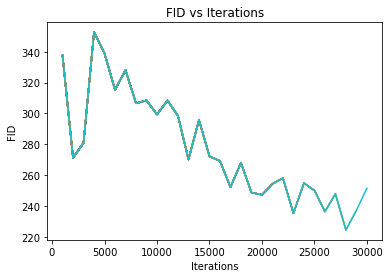

In [5]:
gen = Generator().cuda().to(memory_format=torch.channels_last)
disc = Discriminator().cuda().to(memory_format=torch.channels_last)
prefix = "data_gan/"
#prefix = "data_wgan_gp/"
os.makedirs(prefix, exist_ok=True)
# TODO 1.3.2: Run this line of code.
train_model(
    gen,
    disc,
    num_iterations=int(3e4),
    batch_size=128,
    prefix=prefix,
    gen_loss_fn=compute_generator_loss,
    disc_loss_fn=compute_discriminator_loss,
    log_period=1000,
    wandb_logging=True
)

In [ ]:
print('done')

### VAE

In [ ]:
from vae.model import AEModel, VAEEncoder
from vae.train import vae_loss, main
#from vae.utils import compute_discriminator_loss, compute_generator_loss
#from networks import Discriminator, Generator

In [ ]:
x = torch.randn((2,)+input_shape)
model = AEModel(variational=True, latent_size=128, input_shape = (3, 32, 32))
mu, logvar = model.encoder(x)
print(mu.size(), logvar.size())
print(model.decoder(torch.randn(2, 128)).size())
print(vae_loss(model, x))

In [ ]:
import argparse 
def parse_a2c_arguments():
    # Command-line flags are defined here.
    parser = argparse.ArgumentParser()
    parser.add_argument('--latent_size', dest='latent_size', type=int,
                        default=1024, help="Size of latent space")   # 'LunarLander-v2'
    parser.add_argument('--num_epochs', dest='num_epochs', type=int,
                        default=20, help="Size of latent space")   # 'LunarLander-v2'
    parser.add_argument('--loss_mode', dest='loss_mode', type=str,
                        default='ae', help="Size of latent space")   # 'LunarLander-v2'
    parser.add_argument('--log_dir', dest='log_dir', type=str,
                        default='ae_latent1024', help="directory")
    # ['ae_latent1024','vae_latent1024', 'vae_latent1024_beta_constant0.8','vae_latent1024_beta_linear1']
    parser.add_argument('--beta_mode', dest='beta_mode', type=str,
                        default='constant', help="directorye")   
    # ['constant', 'linear']
    parser.add_argument('--target_beta_val', dest='target_beta_val', type=float,
                        default=0.8, help="final beta")   # 
    # [0.8. 1]
    return parser.parse_known_args()[0]  #parser.parse_args()
args = parse_a2c_arguments()
print(args)

In [ ]:
main(*args.__dict__)